### Homework 2
#### Jennifer Vo 

In [18]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats

##### Part 1

**A little introductory brain teaser. Which is more probable when rolling 2 six-sided dice: rolling snake eyes (two ones) or rolling sevens (dice sum to seven)? What is the ratio of the probabilities?**

The probability of rolling snake eyes (two ones) is 1/6 * 1/6 = 1/36 = 0.02778.

There are 36 possible dice combinations of 2 six-sided dice, and 6 ways to roll seven (6 + 1, 5 + 2, 4 + 3, 3 + 4, 2 + 5, 1 + 6). The probability of rolling sevens (dice sum to seven) is thus 6/36 = 1/6 = 0.1667

The ratio of the probabilities is (1/36) / (1/6) = 1/6 or 0.1667.

#### Part 2
**Following what we did in class show how to use the convolution operator to determine the probability of the sum of 2 six sided dice. Do both analytically (math & counting) and numerically (computer program). Beware the implicit definition of the values (x-axis on histogram).**

The convolution operator is $P_{A+B}(x) = \sum_{z}P_A(z)P_B(x-z)$

##### Analytically (math & counting):

$P(2) = P(1)*P(1) = 1/36$

$P(3) = P(2)*P(1) + P(1)*P(2) = 2/36$

$P(4) = P(3)*P(1) + P(2)*P(2) + P(1)*P(3) = 3/36$

$P(5) = P(4)*P(1) + P(3)*P(2) + P(2)*P(3) + P(1)*P(4) = 4/36$

$P(6) = P(5)*P(1) + P(4)*P(2) + P(3)*P(3) + P(2)*P(4) + P(1)*P(5) = 5/36$

$P(7) = P(6)*P(1) + P(5)*P(2) + P(4)*P(3) + P(3)*P(4) + P(2)*P(5) + P(1)*P(6) = 6/36 = 1/6$

$P(8) = P(6)*P(2) + P(5)*P(3) + P(4)*P(4) + P(3)*P(5) + P(2)*P(6) = 5/36$

$P(9) = P(6)*P(3) + P(5)*P(4) + P(4)*P(5) + P(3)*P(6) = 4/36$

$P(10) = P(6)*P(4) + P(5)*P(5) + P(4)*P(6) = 3/36$

$P(11) = P(6)*P(5) + P(5)*P(6) = 2/36$

$P(12) = P(6)*P(6) = 1/36$

##### Numerically: 

In [19]:
dice_1 = [1/6, 1/6, 1/6, 1/6, 1/6, 1/6]
dice_2 = [1/6, 1/6, 1/6, 1/6, 1/6, 1/6]
conv_dice = np.convolve(dice_1, dice_2)
print(conv_dice)

[0.02777778 0.05555556 0.08333333 0.11111111 0.13888889 0.16666667
 0.13888889 0.11111111 0.08333333 0.05555556 0.02777778]


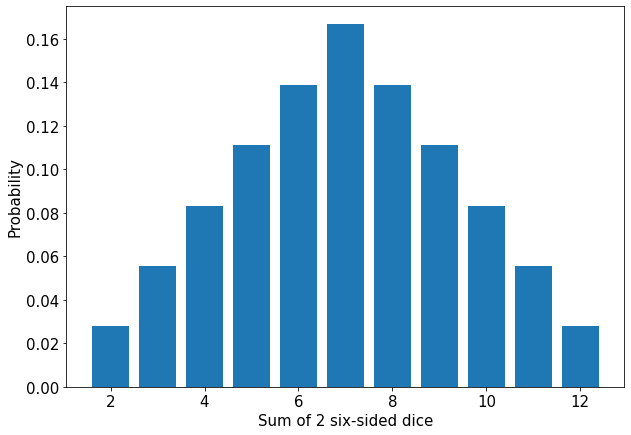

In [20]:
values = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

plt.rcParams["figure.figsize"] = (10,7)
plt.tick_params(labelsize = 15)
plt.bar(values, conv_dice)
plt.xlabel('Sum of 2 six-sided dice', fontsize = 15)
plt.ylabel('Probability', fontsize = 15)
plt.show()

#### Part 3

**Calculate the mean and the variance of the distribution in problem 2. Hint: this is surprisingly tricky, make sure your result makes sense.**

In [21]:
# Here we use the definition of mean = expectation value = sum of (probabilities * value)
avg_x = 0
for i in range (0, 11):
    avg_x += conv_dice[i]*values[i]
    
print(f'The average value (or the mean) for the sum of 2 six-sided dice is {avg_x:.2f}')

The average value (or the mean) for the sum of 2 six-sided dice is 7.00


In [22]:
# Here we use the definition of the variance = E[x^2]-(E[x])^2
avg_xsq = 0
for i in range (0, 11):
    avg_xsq += conv_dice[i]*(values[i]**2)
    
var = avg_xsq - (avg_x*avg_x)
std_dev = var**0.5
    
print(f'The variance of the sum of 2 six-sided dice is {var:.2f}')
print(f'The standard deviation of the sum of 2 six-sided dice is {std_dev:.2f}.')

The variance of the sum of 2 six-sided dice is 5.83
The standard deviation of the sum of 2 six-sided dice is 2.42.


The mean of the distribution is 7, which is consistent with both the graph and what we know about rolling doubles (7 being the most likely value to get).
The variance of the distribution is 5.83, which corresponds to a standard deviation of 2.42. The result makes sense as it is on the order of 7 but smaller than it.

#### Part 4

**Repeat 2, and graph the average of 10 dice. Is this is a Gaussian distribution? Explain in depth.**

In [23]:
#Calculation of sum
standard_dice = [1/6, 1/6, 1/6, 1/6, 1/6, 1/6]
conv_dice = [1/6, 1/6, 1/6, 1/6, 1/6, 1/6]
for i in range (0, 9):
    conv_dice = np.convolve(conv_dice, standard_dice)

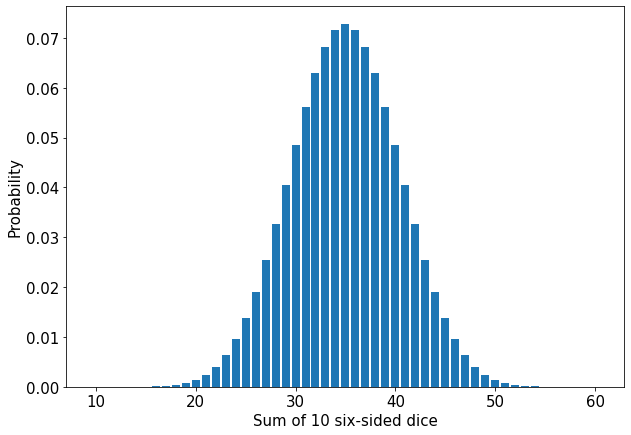

In [24]:
values_10dice = []
for i in range (10, 61):
    values_10dice.append(i)
#print(values_10dice)

plt.tick_params(labelsize = 15)
plt.bar(values_10dice, conv_dice)
plt.xlabel('Sum of 10 six-sided dice', fontsize = 15)
plt.ylabel('Probability', fontsize = 15)
plt.show()

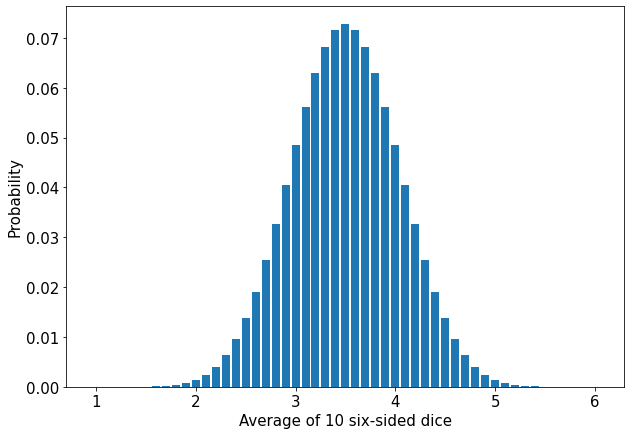

In [25]:
#Calculation of average
x_values = []
for i in range (0, len(values_10dice)):
    x_values.append(values_10dice[i]/10)
    
plt.tick_params(labelsize = 15)
plt.bar(x_values, conv_dice, width = 0.08)
plt.xlabel('Average of 10 six-sided dice', fontsize = 15)
plt.ylabel('Probability', fontsize = 15)
plt.show()

We can determine whether this plot is actually a Gaussian distribution by plotting it on a semi-log graph and comparing the shape to an upside-down parabola.

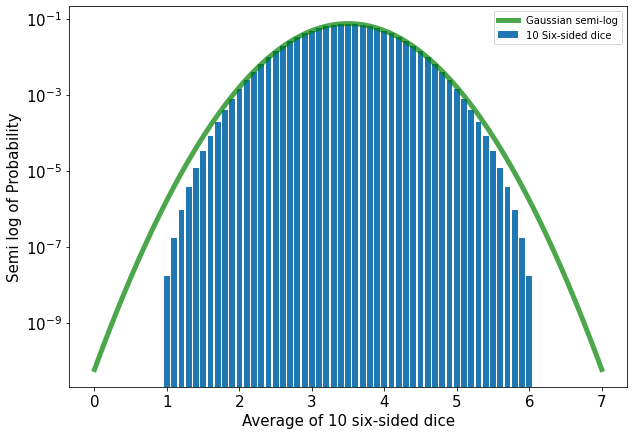

In [26]:
# Plot on semi-log graph
plt.bar(x_values, conv_dice, width = 0.08, label = '10 Six-sided dice')

# Also plotting a Gaussian on semi-log 
x_gauss = np.linspace(0, 7, 1000)
y_gauss = 0.1*stats.norm.pdf(x_gauss, loc=3.5, scale = 1/1.85)
plt.tick_params(labelsize = 15)
plt.plot(x_gauss, y_gauss, 'g', linewidth = 5, alpha = 0.7, label = 'Gaussian semi-log')
plt.legend()
plt.yscale('log')
plt.xlabel('Average of 10 six-sided dice', fontsize = 15)
plt.ylabel('Semi log of Probability', fontsize = 15)
plt.show()

The plot of the average of 10 dice rolls does look very close to a Gaussian, and by plotting it on a semi-log graph it confirms that the shape is approximately an upside-down parabola (characteristic of a Gaussian semi-log plot) only near the mean, but quickly does not match the upside-down parabola shape farther away from the mean. Therefore, we _would not_ consider this a Gaussian distribution.

#### Part 5

**Show that the sum and average of an initially Gaussian distribution is also a Guassian (can be analytic or numerical). How does the standard deviation of the resulting sum or average Guassian change? This is a hugely important result. Explore what this means for integrating a signal over time.**

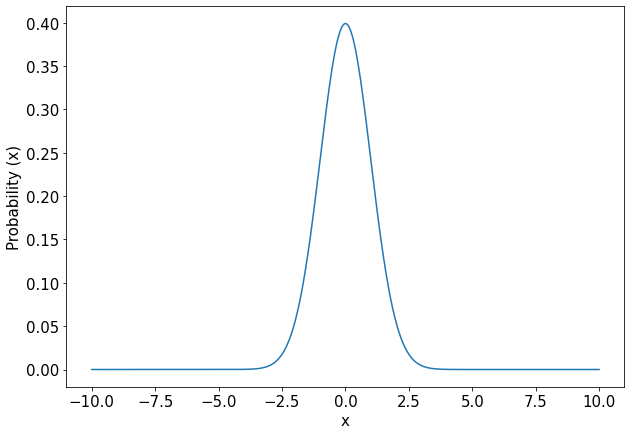

In [35]:
std_gauss = 1
x_gauss = np.linspace(-10,10,1000)
y_gauss = stats.norm.pdf(x_gauss, loc = 0, scale = std_gauss)

plt.rcParams["figure.figsize"] = (10,7)
plt.tick_params(labelsize = 15)
plt.plot(x_gauss,y_gauss)
plt.xlabel('x', fontsize = 15)
plt.ylabel('Probability (x)', fontsize = 15)
plt.show()

In [36]:
#To calculate the sum of 2 gaussians, we use a convolution
conv_gauss = np.convolve(y_gauss, y_gauss)

size = len(conv_gauss)
# print(size)

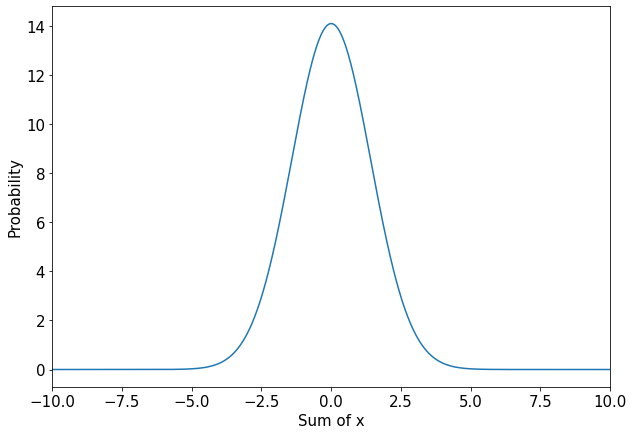

In [37]:
# Creating a new linear space for the convolution distribution, with the same number of values as the convolution result
x_conv = np.linspace(-20, 20, size)

plt.tick_params(labelsize = 15)
plt.plot(x_conv, conv_gauss)
plt.xlim(-10,10)
plt.xlabel('Sum of x', fontsize = 15)
plt.ylabel('Probability', fontsize = 15)
plt.show()

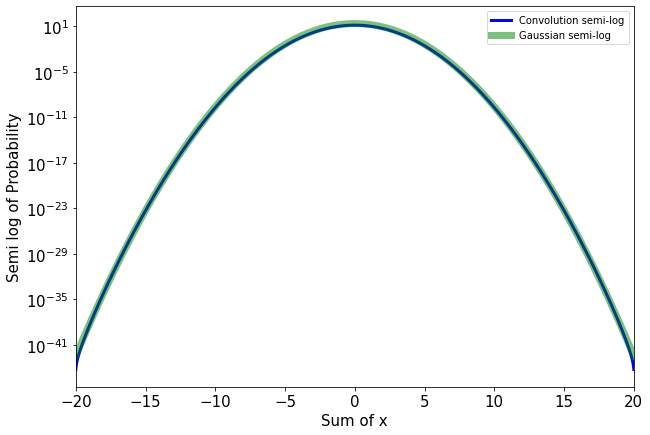

In [38]:
# Check to see if the sum is also Gaussian distributed by plotting on a semi-log plot
x_conv = np.linspace(-20, 20, size)

plt.plot(x_conv, conv_gauss, 'b', linewidth = 3, label = 'Convolution semi-log')
plt.xlim(-20,20)

plt.tick_params(labelsize = 15)
x_gauss = np.linspace(-20,20,1000)
y_gauss = 80*stats.norm.pdf(x_gauss, loc=0, scale = 1/0.71)
plt.plot(x_gauss, y_gauss, 'g', linewidth = 7, alpha = 0.5, label = 'Gaussian semi-log')

plt.xlabel('Sum of x', fontsize = 15)
plt.ylabel('Semi log of Probability', fontsize = 15)
plt.legend()
plt.yscale('log')
plt.show()

I tested out different scaling parameters (standard deviation and overall linear scale of pdf) of the Gaussian distribution until I found the parameters that best overlap with the convolution resultant distribution. As you can see, they are very nearly perfectly overlapping, meaning that _the convolution of the 2 Gaussians is indeed also a Gaussian_.

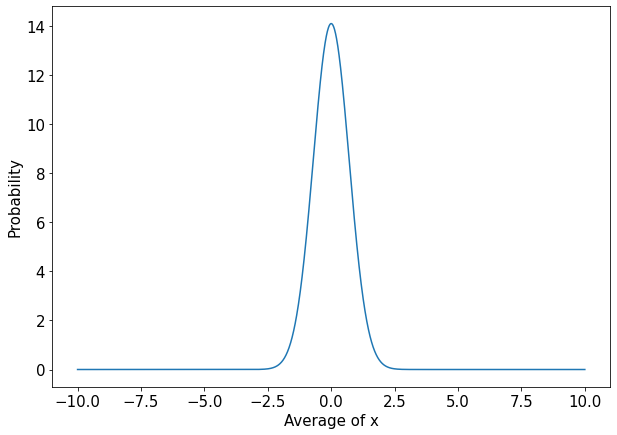

In [39]:
# Now to find the average of 2 Gaussians
plt.plot(x_conv/2, conv_gauss)
plt.tick_params(labelsize = 15)
plt.xlabel('Average of x', fontsize = 15)
plt.ylabel('Probability', fontsize = 15)
plt.show()

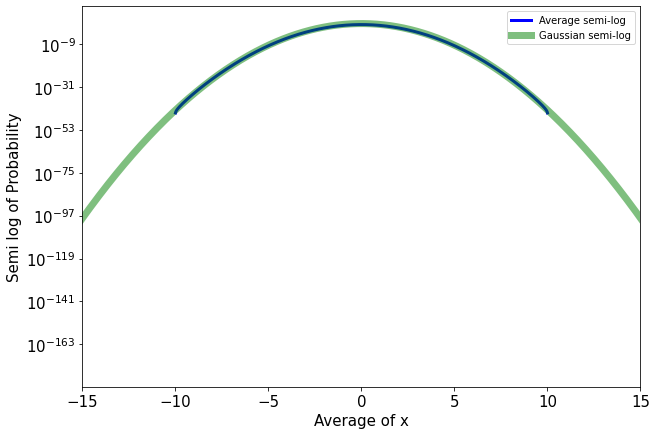

In [40]:
# Determining whether the average of 2 Gaussians is also a Gaussian by plotting on a semi-log plot
plt.plot(x_conv/2, conv_gauss, 'b', linewidth = 3, label = 'Average semi-log')

x_gauss = np.linspace(-20,20,1000)
y_gauss = 80*stats.norm.pdf(x_gauss, loc=0, scale = 1/1.43)
plt.plot(x_gauss, y_gauss, 'g', linewidth = 7, alpha = 0.5, label = 'Gaussian semi-log')

plt.tick_params(labelsize = 15)
plt.xlabel('Average of x', fontsize = 15)
plt.ylabel('Semi log of Probability', fontsize = 15)
plt.legend()
plt.xlim(-15,15)
plt.yscale('log')
plt.show()

As you can see, I also tested out different scaling parameters (standard deviation and overall linear scale of pdf) of the Gaussian distribution until I found the parameters that best overlap with the average distribution. These semi-log plots are also the same shape (upside down parabola) which tells us _the average of the 2 Gaussian distributions is indeed also a Gaussian_.

Finally let's explore how the standard deviations of the convolution and average of Gaussians change.

In [41]:
# Calculating the standard deviation of convolution
# Standard deviation is E[x^2]-(E[x])^2

# Let's define a function to calculate the expectation value of any variable given the probabilities
def calc_exp_value(x, y, p):
    exp_value = 0
    size = len(x)
    bin_width = (x[size-1]-x[0])/size
    for i in range (0, len(x)):
        exp_value += y[i]*(x[i]*bin_width)**p
    return exp_value

sum_mean = calc_exp_value(x_conv, conv_gauss, 1)
sum_exp_xsq = calc_exp_value(x_conv, conv_gauss, 2)
sum_var = sum_exp_xsq - sum_mean**2
sum_std = sum_var**0.5

# Reporting results and observations
print(f'The standard deviation of the n = 2 convolutions of the Gaussian is {sum_std:.4f}.')

The standard deviation of the n = 2 convolutions of the Gaussian is 1.4135.


The square root of n=2 is also 1.414. So, the convolution of the 2 Gaussians has a standard deviation that has increased from 1 to sqrt(2), which is an increase by a factor of sqrt(2) = sqrt(N) where N is the number of distributions that were convolved.

We can generalize this to any number of convolutions, and conclude that the standard deviation increases by a factor of sqrt(N) when you convolve N Gaussian distributions.

In [42]:
# Standard deviation of average of distributions
avg_mean = calc_exp_value(x_conv/2, conv_gauss, 1)
avg_exp_xsq = calc_exp_value(x_conv/2, conv_gauss, 2)
avg_var = avg_exp_xsq - avg_mean**2
avg_std = avg_var**0.5

# Reporting results and observations
print(f'The standard deviation of the average of the Gaussian distributions is {avg_std:.4f}.')

The standard deviation of the average of the Gaussian distributions is 0.3534.


The standard deviation decreases from an original $\sigma$ = 1 to $\sigma$ = 0.3534, which is approximately equal to $\frac{1}{2\sqrt{2}}$.

This is a decrease by a factor of 2*sqrt(2). We can generalize this to any number N of different Gaussians that we take an average of, and conclude that the standard deviation decreases by a factor of N*sqrt(N) when you take the average of N Gaussian distributions.

What does this mean when integrating a signal over time? When we are conducting an experiment where we are taking data over time and recording averages, the background probability distribution should be convolved (over the same time period) to most accurately represent the true probabilities.